# of edges: 115
# of nodes: 99


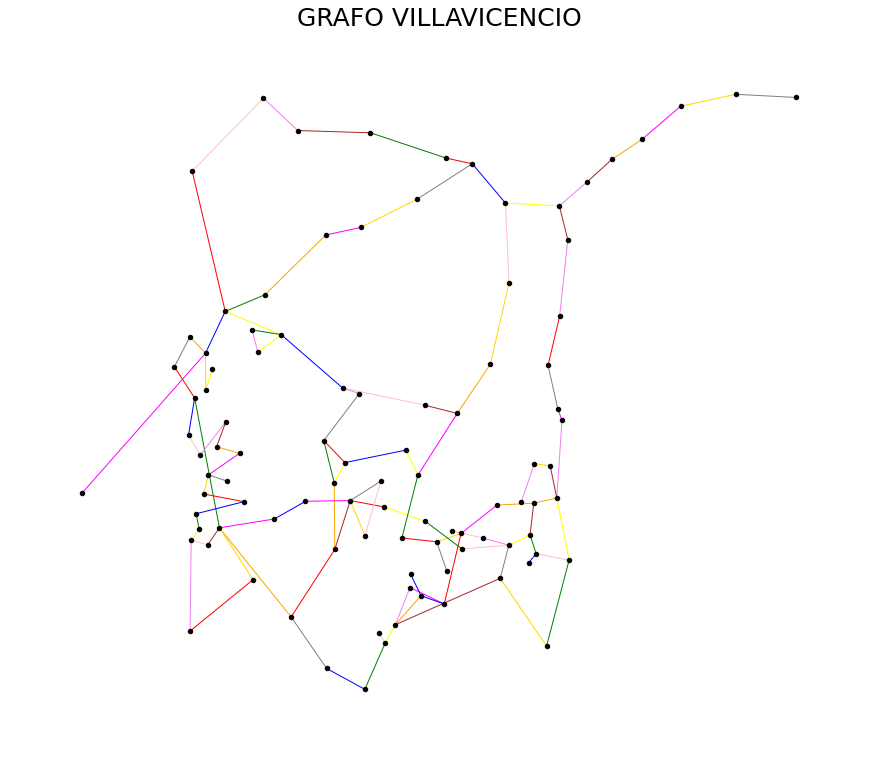

In [1]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
edgelist = pd.read_csv('https://raw.githubusercontent.com/zeroxwx/PROYECTO/main/ARISTAS.csv')
edgelist.head(10)
nodelist = pd.read_csv('https://raw.githubusercontent.com/zeroxwx/PROYECTO/main/NODOS.csv')
nodelist.head(10)
g = nx.Graph()
for i, elrow in edgelist.iterrows():
  g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
for i, nlrow in nodelist.iterrows():
  g.nodes[nlrow['id']].update(nlrow[1:].to_dict())
list(g.edges(data=True))[0:5]
list(g.nodes(data=True))[0:10]

print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

node_positions = {nlrow[0]:(nlrow[1],-nlrow[2]) for i, nlrow in nodelist.iterrows()}
dict(list(node_positions.items())[0:5])

edge_colors = [edges['color'] for i, edges in edgelist.iterrows()]
edge_colors[0:10]
plt.figure(figsize=(12,10))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=20, node_color='black')
plt.title('GRAFO VILLAVICENCIO', size=25)
plt.show()


In [ ]:
node_positions = {nlrow[0]:(nlrow[1],nlrow[2]) for i, nlrow in nodelist.iterrows()}
dict(list(node_positions.items())[0:12])

In [4]:
edge_colors = [edges['color'] for i, edges in edgelist.iterrows()]
edge_colors[0:10]

['red',
 'blue',
 'green',
 'yellow',
 'pink',
 'violet',
 'brown',
 'orange',
 'magenta',
 'gold']

In [5]:
nodes_odd_degree = [v for v, d in g.degree() if d % 2 ==1]
nodes_odd_degree[0:5]
print('Number of nodes of odd degree: {}'.format(len(nodes_odd_degree)))
print('Number of total nodes: {}'.format(len(g.nodes())))

Number of nodes of odd degree: 28
Number of total nodes: 70


In [6]:
odd_node_pairs = list(itertools.combinations(nodes_odd_degree, 2))
odd_node_pairs[0:10]
print('Number of pairs: {}'.format(len(odd_node_pairs)))

Number of pairs: 378


In [7]:
def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
    return distances

In [8]:
odd_node_pairs_shortest_paths = get_shortest_paths_distances(g, odd_node_pairs, 'distance')
dict(list(odd_node_pairs_shortest_paths.items())[0:10])

{('Séptima Brigada', 'Viva centro comercial'): 3,
 ('Séptima Brigada',
  'Corporación Universitaria Autónoma de Nariño - AUNAR'): 2,
 ('Séptima Brigada', 'Cancha Sintética Sport Light'): 4,
 ('Séptima Brigada', 'Polideportivo Doña Luz'): 3,
 ('Séptima Brigada', 'Canchas sintéticas Gol de Yepes'): 10,
 ('Séptima Brigada', 'Parque Cavivir'): 11,
 ('Séptima Brigada', 'Parque Las Malocas - Catama'): 6,
 ('Séptima Brigada', 'Conjunto LlanoAlto'): 9,
 ('Séptima Brigada', 'Parque Pequeña Pony'): 10,
 ('Séptima Brigada', 'COMPLEJO DEPORTIVO BMX COVISAN'): 11}

In [9]:
def create_complete_graph(pair_weights, flip_weights=True):
    g = nx.Graph()
    for k, v in pair_weights.items():
        wt_i = - v if flip_weights else v
        g.add_edge(k[0], k[1], attr_dict={'distance': v, 'weight': wt_i})
    return g

In [10]:
g_odd_complete = create_complete_graph(odd_node_pairs_shortest_paths, flip_weights=True)

print('Number of nodes: {}'.format(len(g_odd_complete.nodes())))
print('Number of edges: {}'.format(len(g_odd_complete.edges())))

Number of nodes: 28
Number of edges: 378


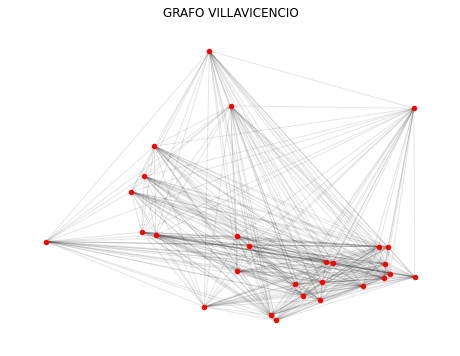

In [11]:
plt.figure(figsize=(8, 6))
pos_random = nx.random_layout(g_odd_complete)
nx.draw_networkx_nodes(g_odd_complete, node_positions, node_size=20, node_color="red")
nx.draw_networkx_edges(g_odd_complete, node_positions, alpha=0.1)
plt.axis('off')
plt.title('GRAFO VILLAVICENCIO')
plt.show()

In [12]:
odd_matching_dupes = nx.algorithms.max_weight_matching(g_odd_complete, True)
print('Number of edges in matching: {}'.format(len(odd_matching_dupes)))

Number of edges in matching: 14


In [13]:
odd_matching = list(pd.unique([tuple(sorted([k, v])) for k, v in odd_matching_dupes]))
print('Number of edges in matching (deduped): {}'.format(len(odd_matching)))
odd_matching

Number of edges in matching (deduped): 14


[('Accesorios la Bonita', 'Parque Pequeña Pony'),
 ('Hotel Deportivo y Recreativo Los Gemelos', 'Villa Danny Villavicencio'),
 ('Delirio covisan', 'Parque Cavivir'),
 ('ALTOS DE OKAVANGO', 'Colegio Marco Antonio Franco Rodriguez'),
 ('Francachela Pizza Parrilla', 'Parque Las Malocas - Catama'),
 ('Canchas sintéticas Gol de Yepes', 'Parque Okavango'),
 ('Campo Santo Papa Francisco - Misa Campal', 'Polideportivo Doña Luz'),
 ('Corporación Universitaria Autónoma de Nariño - AUNAR', 'Hotel Italia'),
 ('Centro Comercial UNICO Outlet Villavicencio - Tienda Virtual Outlet',
  'Séptima Brigada'),
 ('Autoservicios Mecánicos', 'Viva centro comercial'),
 ('Cancha Sintética Sport Light', 'Parque maracos'),
 ('COMPLEJO DEPORTIVO BMX COVISAN',
  'Institucion Educativa Jorge Eliecer Gaitan Ayala Sede Atanacio Girardot'),
 ('Conjunto LlanoAlto', 'IMMUNOCAL@WMB2019'),
 ('CHATARRERIA MINCHO', 'Parque Habitacional La Esmeralda')]

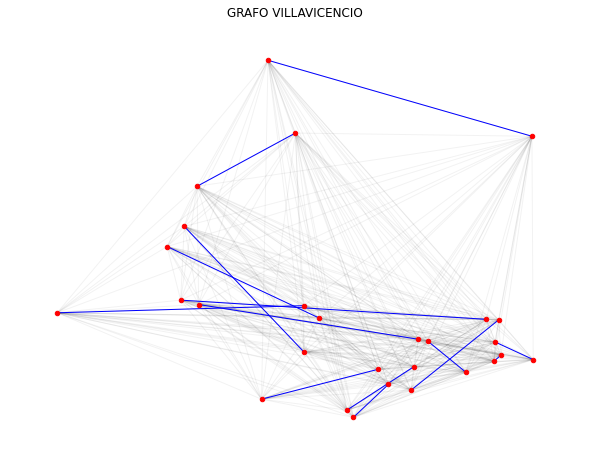

In [14]:
plt.figure(figsize=(8, 6))

nx.draw(g_odd_complete, pos=node_positions, node_size=20, alpha=0.05)

g_odd_complete_min_edges = nx.Graph(odd_matching)
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, edge_color='blue', node_color='red')

plt.title('GRAFO VILLAVICENCIO')
plt.show()

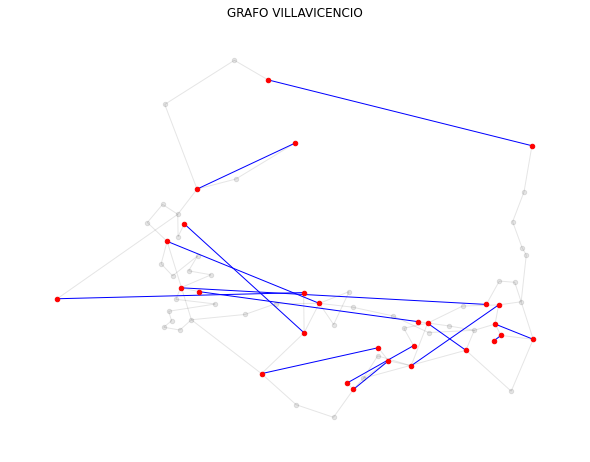

In [15]:
plt.figure(figsize=(8, 6))
nx.draw(g, pos=node_positions, node_size=20, alpha=0.1, node_color='black')

nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, alpha=1, node_color='red', edge_color='blue')

plt.title('GRAFO VILLAVICENCIO')
plt.show()

In [16]:
def add_augmenting_path_to_graph(graph, min_weight_pairs):
    graph_aug = nx.MultiGraph(graph.copy())
    for pair in min_weight_pairs:
        graph_aug.add_edge(pair[0],
                           pair[1],
                           attr_dict={'distancia': nx.dijkstra_path_length(graph, pair[0], pair[1]),
                                      'sendero': 'augmented'}
                          )
    return graph_aug

In [17]:
g_aug = add_augmenting_path_to_graph(g, odd_matching)
print('Number of edges in original graph: {}'.format(len(g.edges())))
print('Number of edges in augmented graph: {}'.format(len(g_aug.edges())))

Number of edges in original graph: 77
Number of edges in augmented graph: 91


In [18]:
pd.value_counts(g_aug.degree())

(Séptima Brigada, 4)                                                        1
(Parque Habitacional La Esmeralda, 4)                                       1
(IMMUNOCAL@WMB2019, 4)                                                      1
(Accesorios la Bonita, 2)                                                   1
(Polideportivo Barrio Morichal, 2)                                          1
                                                                           ..
(Monumento flora de vida, 4)                                                1
(Parque Pequeña Pony, 2)                                                    1
(Conjunto Cerrado Ciudad Salitre, 2)                                        1
(COMPLEJO DEPORTIVO BMX COVISAN, 4)                                         1
(Centro Comercial UNICO Outlet Villavicencio - Tienda Virtual Outlet, 2)    1
Length: 70, dtype: int64

In [34]:
naive_euler_circuit = list(nx.eulerian_circuit(g_aug, source='Universidad Cooperativa de Colombia'))
print('Length of eulerian circuit: {}'.format(len(naive_euler_circuit)))

Length of eulerian circuit: 91


In [35]:
naive_euler_circuit[0:55]

[('Universidad Cooperativa de Colombia', 'Nuestra Señora de Lourdes'),
 ('Nuestra Señora de Lourdes', 'Polideportivo Doña Luz'),
 ('Polideportivo Doña Luz', 'Campo Santo Papa Francisco - Misa Campal'),
 ('Campo Santo Papa Francisco - Misa Campal', 'Parque maracos'),
 ('Parque maracos', 'Asadero la Finquita Rodeo'),
 ('Asadero la Finquita Rodeo', 'Torres de Franciso'),
 ('Torres de Franciso', 'Parque maracos'),
 ('Parque maracos', 'Barrio San Carlos'),
 ('Barrio San Carlos', 'Polideportivo Antonio Villavicencio'),
 ('Polideportivo Antonio Villavicencio',
  'Iglesia Cristiana Pentecostes Del Movimiento Misionero Mundial Covisan'),
 ('Iglesia Cristiana Pentecostes Del Movimiento Misionero Mundial Covisan',
  'OKAVANGO La Esmeralda'),
 ('OKAVANGO La Esmeralda', 'Polideportivo Covisan'),
 ('Polideportivo Covisan', 'Delirio covisan'),
 ('Delirio covisan', 'Parque Cavivir'),
 ('Parque Cavivir', 'Canchas sintéticas Gol de Yepes'),
 ('Canchas sintéticas Gol de Yepes', 'Lote Kirpas'),
 ('Lote Ki

In [38]:
def create_eulerian_circuit(graph_augmented, graph_original, starting_node=None):
    euler_circuit = []
    naive_circuit = list(nx.eulerian_circuit(graph_augmented, source=starting_node))
    for edge in naive_circuit:
        edge_data = graph_augmented.get_edge_data(edge[0], edge[1])    
        #print(edge_data[0])
        if edge_data[0]['attr_dict']['sendero'] != 'augmented':
            # If `edge` exists in original graph, grab the edge attributes and add to eulerian circuit.
            edge_att = graph_original[edge[0]][edge[1]]
            euler_circuit.append((edge[0], edge[1], edge_att))
        else:
            aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='distance')
            aug_path_pairs = list(zip(aug_path[:-1], aug_path[1:]))

            print('Filling in edges for augmented edge: {}'.format(edge))
            print('Augmenting path: {}'.format(' => '.join(aug_path)))
            print('Augmenting path pairs: {}\n'.format(aug_path_pairs))

            # If `edge` does not exist in original graph, find the shortest path between its nodes and
            #  add the edge attributes for each link in the shortest path.
            for edge_aug in aug_path_pairs:
                edge_aug_att = graph_original[edge_aug[0]][edge_aug[1]]
                euler_circuit.append((edge_aug[0], edge_aug[1], edge_aug_att))

    return euler_circuit

In [39]:
euler_circuit = create_eulerian_circuit(g_aug, g, 'Universidad Cooperativa de Colombia')

Filling in edges for augmented edge: ('Polideportivo Doña Luz', 'Campo Santo Papa Francisco - Misa Campal')
Augmenting path: Polideportivo Doña Luz => Nuestra Señora de Lourdes => Universidad Cooperativa de Colombia => Polideportivo La Rosita => Clinica de Salud Mental-La Confraternidad => Cancha Sintética Sport Light => BARRIO ACAPULCO => Parque Las Malocas - Catama => Campo Santo Papa Francisco - Misa Campal
Augmenting path pairs: [('Polideportivo Doña Luz', 'Nuestra Señora de Lourdes'), ('Nuestra Señora de Lourdes', 'Universidad Cooperativa de Colombia'), ('Universidad Cooperativa de Colombia', 'Polideportivo La Rosita'), ('Polideportivo La Rosita', 'Clinica de Salud Mental-La Confraternidad'), ('Clinica de Salud Mental-La Confraternidad', 'Cancha Sintética Sport Light'), ('Cancha Sintética Sport Light', 'BARRIO ACAPULCO'), ('BARRIO ACAPULCO', 'Parque Las Malocas - Catama'), ('Parque Las Malocas - Catama', 'Campo Santo Papa Francisco - Misa Campal')]

Filling in edges for augmented 

In [40]:
print('Length of Eulerian circuit: {}'.format(len(euler_circuit)))

Length of Eulerian circuit: 182


In [41]:
for i, edge in enumerate(euler_circuit[0:20]):
    print(i, edge)

0 ('Universidad Cooperativa de Colombia', 'Nuestra Señora de Lourdes', {'attr_dict': {'sendero': 'rs', 'distancia': 0.75, 'color': 'magenta', 'estimate': 0}, 'sequence': '112, 115', 'visits': 2})
1 ('Nuestra Señora de Lourdes', 'Polideportivo Doña Luz', {'attr_dict': {'sendero': 'rs', 'distancia': 0.45, 'color': 'gold', 'estimate': 0}, 'sequence': '113, 114', 'visits': 2})
2 ('Polideportivo Doña Luz', 'Nuestra Señora de Lourdes', {'attr_dict': {'sendero': 'rs', 'distancia': 0.45, 'color': 'gold', 'estimate': 0}, 'sequence': '113, 114', 'visits': 2})
3 ('Nuestra Señora de Lourdes', 'Universidad Cooperativa de Colombia', {'attr_dict': {'sendero': 'rs', 'distancia': 0.75, 'color': 'magenta', 'estimate': 0}, 'sequence': '112, 115', 'visits': 2})
4 ('Universidad Cooperativa de Colombia', 'Polideportivo La Rosita', {'attr_dict': {'sendero': 'rs', 'distancia': 0.32, 'color': 'pink', 'estimate': 0}, 'sequence': '109, 116, 159, 172', 'visits': 4})
5 ('Polideportivo La Rosita', 'Clinica de Salud

In [42]:
total_mileage_of_circuit = sum([edge[2]['attr_dict']['distancia'] for edge in euler_circuit])
total_mileage_on_orig_trail_map = sum(nx.get_edge_attributes(g, 'distancia').values())
_vcn = pd.value_counts(pd.value_counts([(e[0]) for e in euler_circuit]), sort=False)
node_visits = pd.DataFrame({'n_visits': _vcn.index, 'n_nodes': _vcn.values})
_vce = pd.value_counts(pd.value_counts([sorted(e)[0] + sorted(e)[1] for e in nx.MultiDiGraph(euler_circuit).edges()]))
edge_visits = pd.DataFrame({'n_visits': _vce.index, 'n_edges': _vce.values})

print('Mileage of circuit: {0:.2f}'.format(total_mileage_of_circuit))
print('Mileage on original trail map: {0:.2f}'.format(total_mileage_on_orig_trail_map))
print('Mileage retracing edges: {0:.2f}'.format(total_mileage_of_circuit-total_mileage_on_orig_trail_map))

print('Number of edges in circuit: {}'.format(len(euler_circuit)))
print('Number of edges in original graph: {}'.format(len(g.edges())))
print('Number of nodes in original graph: {}\n'.format(len(g.nodes())))

print('Number of edges traversed more than once: {}\n'.format(len(euler_circuit)-len(g.edges())))  

print('Number of times visiting each node:')
print(node_visits.to_string(index=False))

print('\nNumber of times visiting each edge:')
print(edge_visits.to_string(index=False))

Mileage of circuit: 171.95
Mileage on original trail map: 0.00
Mileage retracing edges: 171.95
Number of edges in circuit: 182
Number of edges in original graph: 77
Number of nodes in original graph: 70

Number of edges traversed more than once: 105

Number of times visiting each node:
 n_visits  n_nodes
        9        1
        8        2
        7        2
        5        4
        4        7
        3       13
        2       15
        1       26

Number of times visiting each edge:
 n_visits  n_edges
        2       32
        1       21
        3       12
        4        5
        5        4
        7        3


In [43]:
def create_cpp_edgelist(euler_circuit):
    cpp_edgelist = {}

    for i, e in enumerate(euler_circuit):
        edge = frozenset([e[0], e[1]])

        if edge in cpp_edgelist:
            cpp_edgelist[edge][2]['sequence'] += ', ' + str(i)
            cpp_edgelist[edge][2]['visits'] += 1

        else:
            cpp_edgelist[edge] = e
            cpp_edgelist[edge][2]['sequence'] = str(i)
            cpp_edgelist[edge][2]['visits'] = 1

    return list(cpp_edgelist.values())

In [44]:
cpp_edgelist = create_cpp_edgelist(euler_circuit)
print('Number of edges in CPP edge list: {}'.format(len(cpp_edgelist)))

Number of edges in CPP edge list: 77


In [45]:
cpp_edgelist[0:3]

[('Universidad Cooperativa de Colombia',
  'Nuestra Señora de Lourdes',
  {'attr_dict': {'sendero': 'rs',
    'distancia': 0.75,
    'color': 'magenta',
    'estimate': 0},
   'sequence': '0, 3',
   'visits': 2}),
 ('Nuestra Señora de Lourdes',
  'Polideportivo Doña Luz',
  {'attr_dict': {'sendero': 'rs',
    'distancia': 0.45,
    'color': 'gold',
    'estimate': 0},
   'sequence': '1, 2',
   'visits': 2}),
 ('Universidad Cooperativa de Colombia',
  'Polideportivo La Rosita',
  {'attr_dict': {'sendero': 'rs',
    'distancia': 0.32,
    'color': 'pink',
    'estimate': 0},
   'sequence': '4, 131, 134, 169',
   'visits': 4})]

In [46]:
g_cpp = nx.Graph(cpp_edgelist)

plt.figure(figsize=(14, 10))

visit_colors = {1:'lightgray', 2:'blue', 3: 'red', 4 : 'black', 5 : 'green'}
edge_colors = [visit_colors[e[2]['visits']] for e in g_cpp.edges(data=True)]
node_colors = ['red'  if node in nodes_odd_degree else 'lightgray' for node in g_cpp.nodes()]

nx.draw_networkx(g_cpp, pos=node_positions, node_size=20, node_color=node_colors, edge_color=edge_colors, with_labels=False)
plt.axis('off')
plt.show()

KeyError: 7

<Figure size 1008x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(14, 10))

edge_colors = [e[2]['attr_dict']['color'] for e in g_cpp.edges(data=True)]
nx.draw_networkx(g_cpp, pos=node_positions, node_size=10, node_color='black', edge_color=edge_colors, with_labels=False, alpha=0.5)

bbox = {'ec':[1,1,1,0], 'fc':[1,1,1,0]}  # hack to label edges over line (rather than breaking up line)
edge_labels = nx.get_edge_attributes(g_cpp, 'sequence')
nx.draw_networkx_edge_labels(g_cpp, pos=node_positions, edge_labels=edge_labels, bbox=bbox, font_size=6)

plt.axis('off')
plt.show()

In [ ]:
visit_colors = {1:'orange', 2:'green', 3: 'red', 4 : 'black', 5 : 'blue'}
edge_cnter = {}
g_i_edge_colors = []
for i, e in enumerate(euler_circuit, start=1):

    edge = frozenset([e[0], e[1]])
    if edge in edge_cnter:
        edge_cnter[edge] += 1
    else:
        edge_cnter[edge] = 1

    nx.draw_networkx(g_cpp, pos=node_positions, node_size=6, node_color='black', with_labels=False, alpha=0.07)

    # Edges walked as of iteration i
    euler_circuit_i = copy.deepcopy(euler_circuit[0:i])
    for i in range(len(euler_circuit_i)):
        edge_i = frozenset([euler_circuit_i[i][0], euler_circuit_i[i][1]])
        euler_circuit_i[i][2]['visits_i'] = edge_cnter[edge_i]
    g_i = nx.Graph(euler_circuit_i)
    g_i_edge_colors = [visit_colors[e[2]['visits_i']] for e in g_i.edges(data=True)]

    nx.draw_networkx_nodes(g_i, pos=node_positions, node_size=6, alpha=0.6, node_color='black', linewidths=0.1)
    nx.draw_networkx_edges(g_i, pos=node_positions, edge_color=g_i_edge_colors, alpha=0.8)

    plt.axis('off')
    plt.savefig('/content/drive/MyDrive/Datos II/gif/img{}.png'.format(i), dpi=120, bbox_inches='tight')
    plt.close()

In [ ]:
import glob
import numpy as np
import imageio
import os
import graphviz

def make_circuit_video(image_path, movie_filename, fps=7):
    filenames = glob.glob(image_path + 'img*.png')
    filenames_sort_indices = np.argsort([int(os.path.basename(filename).split('.')[0][3:]) for filename in filenames])
    filenames = [filenames[i] for i in filenames_sort_indices]

    with imageio.get_writer(movie_filename, mode='I', fps=fps) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

make_circuit_video('/content/drive/MyDrive/Datos II/gif/','/content/drive/MyDrive/Datos II/cpp_route_animation.gif',fps=3)